In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

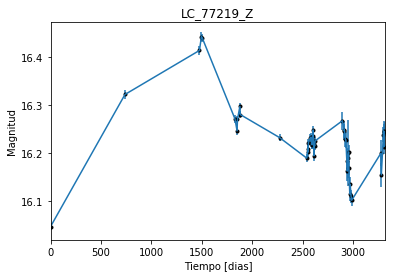

In [2]:
data = np.genfromtxt('LC_77219_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_77219_Z')
plt.savefig("LC_77219_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

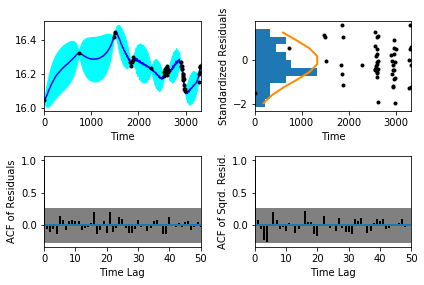

In [5]:
sample.assess_fit()

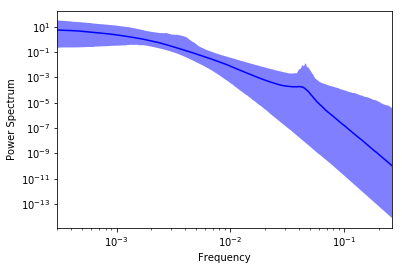

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

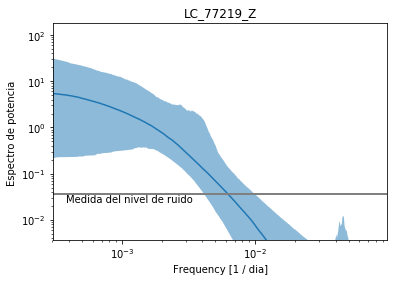

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_77219_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_77219_Z')

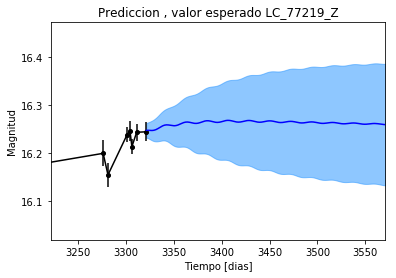

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_77219_Z')

Text(0.5,1,'Prediccion, Caminos simulados LC_77219_Z')

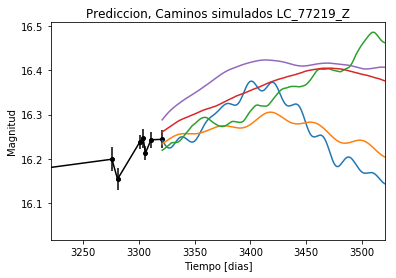

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_77219_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


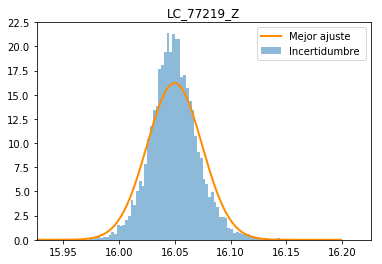

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_77219_Z')
plt.savefig("Mejor_ajuste_LC_77219_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_77219_Z')

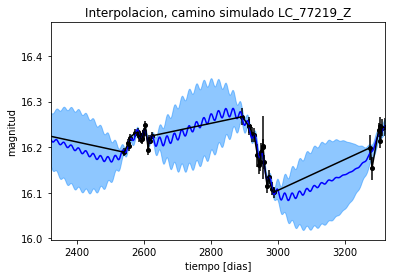

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_77219_Z')

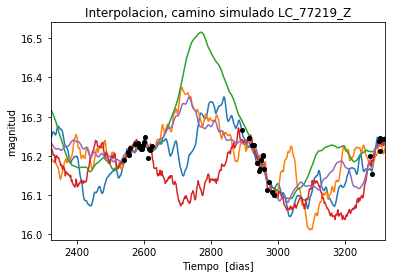

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 712.022983664
Median: 0.00371209368233
Standard deviation: 0.0938103010834
68% credibility interval: [ 0.00058321  0.08528333]
95% credibility interval: [  3.38598222e-04   3.78868214e-01]
99% credibility interval: [  3.13287545e-04   4.82962360e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 565.504042242
Median: 0.0014411035133
Standard deviation: 0.0490211230515
68% credibility interval: [ 0.00047125  0.02357294]
95% credibility interval: [ 0.00032643  0.16464343]
99% credibility interval: [  3.07256862e-04   3.77894183e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 502.020442659
Median: 0.00792261033099
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 295.713051169
Median: 134.099304963
Standard deviation: 2.36826433428
68% credibility interval: [ 131.98332338  136.79717448]
95% credibility interval: [ 129.43072753  138.71221978]
99% credibility interval: [ 127.27871157  139.26392736]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 371.378175886
Median: 0.205481231065
Standard deviation: 1.19064442437
68% credibility interval: [ 0.02785574  2.12581138]
95% credibility interval: [ 0.01234028  3.9055759 ]
99% credibility interval: [ 0.00945567  5.01228525]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1138.1014338
Median: 0.108757699368
Standard deviation: 2.20651893348
68% credibility interval: [ 0.04187419  2.19090787]
95% credibility interval: [  1.45081228e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2084.14481051
Median: 4.51075045557e-22
Standard deviation: 1.88683782744e+131
68% credibility interval: [  2.06014759e-80   1.44329469e+00]
95% credibility interval: [  1.17277589e-225   2.82630594e+037]
99% credibility interval: [  6.22194485e-232   1.06823424e+114]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1544.39121025
Median: 16.2350466086
Standard deviation: 0.0591698247743
68% credibility interval: [ 16.18638297  16.28163689]
95% credibility interval: [ 16.11576085  16.35205477]
99% credibility interval: [ 16.05671817  16.43093047]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 311.560039155
Median: 0.0429086850307
Standard deviation: 0.111442355885
68% credibility interval: [ 0.          0.14735533]
95% credibility interval: [ 0.          0.42458659]
99% credibility interval: [ 0.          0.50064693]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 311.560039155
Median: 0.0429086850307
Standard deviation: 0.111442355885
68% credibility interval: [ 0.          0.14735533]
95% credibility interval: [ 0.          0.42458659]
99% credibility interval: [ 0.          0.50064693]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 301.706721133
Median: 0.0
Standard deviation: 0.000995675712752
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 295.713051169
Median: 134.099304963
Standard deviation: 2.36826433428
68% credibility interval: [ 131.98332338  136.79717448]
95% credibility interval: [ 129.43072753  138.71221978]
99% credibility interval: [ 127.27871157  139.26392736]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2412.62615775
Median: 0.0151205505313
Standard deviation: 0.0184345802766
68% credibility interval: [ 0.00929801  0.02893224]
95% credibility interval: [ 0.0062974   0.05745033]
99% credibility interval: [ 0.00488619  0.12598634]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 956.035243961
Median: 1.05906104277
Standard deviation: 0.210322457276
68% credibility interval: [ 0.87490553  1.28584114]
95% credibility interval: [ 0.72986707  1.53404989]
99% credibility interval: [ 0.64486106  1.72018004]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 890.036093504
Median: 3.51464017669e-05
Standard deviation: 0.00567475767408
68% credibility interval: [  1.28283825e-06   1.63874897e-03]
95% credibility interval: [  2.44272990e-42   1.51416300e-02]
99% credibility interval: [  2.85563169e-119   3.50190994e-002]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 712.022983664
Median: (-0.0233237724837+0j)
Standard deviation: 0.915272086236
68% credibility interval: [-0.53585097 -1.86868346e+00j -0.00366441 -1.31079064e-03j]
95% credibility interval: [ -2.38049920e+00+0.j          -2.12747537e-03-0.00190824j]
99% credibility interval: [ -3.03454200e+00+0.j          -1.96844370e-03-0.26783959j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 565.504042242
Median: (-0.00905472042088+0.0439798382365j)
Standard deviation: 0.76496250145
68% credibility interval: [-0.14811316+0.4655359j  -0.00296093+0.28156965j]
95% credibility interval: [-1.03448518 +2.09894283e+00j -0.00205103 +1.15108987e-03j]
99% credibility interval: [ -2.37437918e+00+1.87145207j  -1.93055180e-03+0.j        ]
Po